In [1]:
from pandas_datareader import data

In [2]:
ko = data.DataReader("KO", 
                       start='2000-1-1', 
                       end='2020-12-31', 
                       data_source='yahoo')

In [3]:
ko = ko.reset_index()
ko

,Date,High,Low,Open,Close,Volume,Adj Close
0,2000-01-03,29.000000,27.625000,29.000000,28.187500,10997000.0,15.824934
1,2000-01-04,28.406250,27.812500,28.187500,28.218750,7308000.0,15.842479
2,2000-01-05,28.718750,28.031250,28.218750,28.468750,9457400.0,15.982841
3,2000-01-06,28.843750,28.281250,28.468750,28.500000,7129200.0,16.000380
4,2000-01-07,30.375000,28.937500,28.937500,30.375000,11474000.0,17.053038
...,...,...,...,...,...,...,...
5279,2020-12-24,53.549999,53.020000,53.020000,53.439999,3265500.0,53.439999
5280,2020-12-28,54.439999,53.730000,53.849998,54.160000,9020500.0,54.160000
5281,2020-12-29,54.490002,54.020000,54.450001,54.130001,8320600.0,54.130001
5282,2020-12-30,54.630001,54.029999,54.049999,54.439999,8142700.0,54.439999


In [4]:
ko['Year'] = ko['Date'].dt.year
ko['month'] = ko['Date'].dt.month
ko['day'] = ko['Date'].dt.day

In [5]:
ko.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Year,month,day
0,2000-01-03,29.00000,27.62500,29.00000,28.18750,10997000.0,15.824934,2000,1,3
1,2000-01-04,28.40625,27.81250,28.18750,28.21875,7308000.0,15.842479,2000,1,4
2,2000-01-05,28.71875,28.03125,28.21875,28.46875,9457400.0,15.982841,2000,1,5
3,2000-01-06,28.84375,28.28125,28.46875,28.50000,7129200.0,16.000380,2000,1,6
4,2000-01-07,30.37500,28.93750,28.93750,30.37500,11474000.0,17.053038,2000,1,7


In [6]:
def quarter(row):
    if row['month'] == 1 or row['month'] == 2 or row['month'] == 3:
        return 1
    elif row['month'] == 4 or row['month'] == 5 or row['month'] == 6:
        return 4
    elif row['month'] == 7 or row['month'] == 8 or row['month'] == 9:
        return 7
    else:
        return 10

ko['quarter'] = ko.apply(quarter, axis =1)

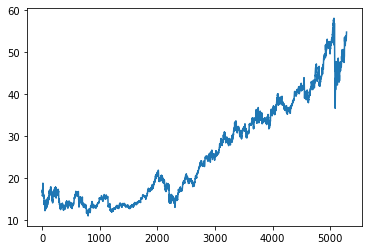

In [7]:
import matplotlib.pyplot as plt
plt.plot(ko['Adj Close'])
plt.show()

In [8]:
# from datetime import datetime
# import pandas_datareader.data as wb

# stocklist = ['AAPL','GOOG','FB','AMZN','COP']

# start = datetime(2016,6,8)
# end = datetime(2016,6,11)

# p = wb.DataReader(stocklist, 'yahoo',start,end)

In [66]:
import pandas as pd

data = pd.read_csv('data_usa.csv', index_col=0)

data_ko = data[data['year'] >= 2000 ]
data_ko

,DATE,GDP,growth_rate,year,month,jobs,growth_jobs
212,2000-01-01,10002.857,1.045308,2000,1,131005,0.636057
213,2000-04-01,10247.679,2.447521,2000,4,131888,0.674020
214,2000-07-01,10319.825,0.704023,2000,7,132236,0.263860
215,2000-10-01,10439.025,1.155058,2000,10,132351,0.086966
216,2001-01-01,10472.879,0.324302,2001,1,132698,0.262182
...,...,...,...,...,...,...,...
291,2019-10-01,21729.124,0.866119,2019,10,151524,0.404869
292,2020-01-01,21539.689,-0.871802,2020,1,152234,0.468573
293,2020-04-01,19520.114,-9.376064,2020,4,130161,-14.499389
294,2020-07-01,21170.252,8.453526,2020,7,139566,7.225667


In [125]:
ko_final = pd.merge(left = data_ko.reset_index(drop=True), right = ko, left_on = 'month', right_on = 'quarter', how= 'left')

In [145]:
ko_final = ko_final[['Date','GDP','growth_rate','jobs','growth_jobs','High','Low','Open','Close','Volume','Adj Close','quarter','Year','month_y','day']].set_index('Date')



ko_final.dtypes

GDP            float64
growth_rate    float64
jobs             int64
growth_jobs    float64
High           float64
Low            float64
Open           float64
Close          float64
Volume         float64
Adj Close      float64
quarter          int64
Year             int64
month_y          int64
day              int64
dtype: object

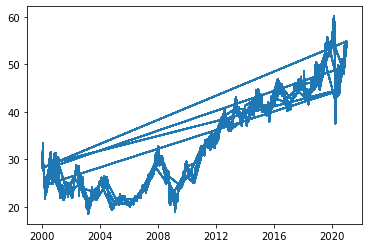

In [146]:
plt.plot(ko_final['Close'])

In [194]:

X = ko_final.drop(['GDP','jobs','Close','Volume'], axis = 1)
y = ko_final['Close']

X_train = X[:105416]
y_train = y[1:105417]

X_test = X[105416:len(X)-1]
y_test = y[105417:]


In [149]:
display(X,y)

,growth_rate,growth_jobs,High,Low,Open,Adj Close,quarter,Year,month_y,day
Date,,,,,,,,,,
2000-01-03,1.045308,0.636057,29.000000,27.625000,29.000000,15.824934,1,2000,1,3
2000-01-04,1.045308,0.636057,28.406250,27.812500,28.187500,15.842479,1,2000,1,4
2000-01-05,1.045308,0.636057,28.718750,28.031250,28.218750,15.982841,1,2000,1,5
2000-01-06,1.045308,0.636057,28.843750,28.281250,28.468750,16.000380,1,2000,1,6
2000-01-07,1.045308,0.636057,30.375000,28.937500,28.937500,17.053038,1,2000,1,7
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,1.500426,2.134474,53.549999,53.020000,53.020000,53.439999,10,2020,12,24
2020-12-28,1.500426,2.134474,54.439999,53.730000,53.849998,54.160000,10,2020,12,28
2020-12-29,1.500426,2.134474,54.490002,54.020000,54.450001,54.130001,10,2020,12,29


Date
2000-01-03    28.187500
2000-01-04    28.218750
2000-01-05    28.468750
2000-01-06    28.500000
2000-01-07    30.375000
                ...    
2020-12-24    53.439999
2020-12-28    54.160000
2020-12-29    54.130001
2020-12-30    54.439999
2020-12-31    54.840000
Name: Close, Length: 110964, dtype: float64

In [150]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
display(xgb_reg.score(X_test,y_test))
display(xgb_reg.score(X_train,y_train))

[09:42:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9958734803015187

0.9955708841734701

In [151]:
pred = xgb_reg.predict(X_test)

In [152]:
display(pred[-1],y.tail())

52.526737

Date
2020-12-24    53.439999
2020-12-28    54.160000
2020-12-29    54.130001
2020-12-30    54.439999
2020-12-31    54.840000
Name: Close, dtype: float64

In [153]:
from sklearn.metrics import r2_score

#confusion_matrix(y_test, pred).ravel()
r2_score(y_test, pred)


0.9958734803015187

In [234]:
from sklearn.model_selection import cross_validate

results = cross_validate(xgb_reg,X_train, y_train, cv = 10)


[13:38:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [235]:
results['test_score'].mean()
results['test_score']

array([0.99553568, 0.99573958, 0.99565651, 0.99559741, 0.99562182,
       0.99538523, 0.99532126, 0.99563433, 0.99554459, 0.99551751])

In [236]:
import pickle

pickle.dump(xgb_reg, open('model_ko.p', 'wb'))